### Plotting WY22 and WY23 winter and non-winter event NO<sub>3</sub><sup>-</sup> and total phosphorus (TP) yields, NO<sub>3</sub><sup>-</sup>/TP to water yield ratios, and cumulative yields. 

### Yields were extracted in this notebook: https://github.com/MeganEDuffy/cQ_analysis/blob/main/millar2021_R_separation_hysteresis/sonya-may24/SV-2024.05.24-data_Millar_custom-input.ipynb

- This code delineates both purely automated events (using the RDF approach and based on Millar et al 2021 R workflow) and also takes as input manually (custom) delineated events, which works best for winter storms.

- The SV dataset is year-round, so in this notebook I use the RDF events for non-winter and the custom events for winter.
 - I manually changed the TP column in wb_q_chem.csv (from SV 2024-05-24) to be 'TP' (as for the Hungerford file) rather than 'TP_mgL' to be consistent. 


### Contextualizaing data: Kincaid et al., 2020 Hungerford and Wade data (2014-2018 non-winter events) with yields extracted here (similar to above) in this notebook: https://github.com/MeganEDuffy/cQ_analysis/blob/main/millar2021_R_separation_hysteresis/kincaid2020_hydroshare/Kincaid2020_Millar_custom-input.ipynb

In [8]:
################
# LOAD PACKAGES #
################

library(tidyverse)
library(viridis)
library(lubridate)
library(patchwork)

###################
# SET DIRECTORIES #
###################

setwd("~//OneDrive/git-repos/EMMA")

input_dir <- "soil-resins/"
output_dir <- "soil-resins/output"

# custom event delineation scripts puts original yields here:
SV_2021_2023_input_dir <- "~//OneDrive/git-repos/cQ_analysis/millar2021_R_separation_hysteresis/sonya-may24/custom-events_output/"
DK_2014_2018_yield_input_dir <- "~//OneDrive/git-repos/cQ_analysis/millar2021_R_separation_hysteresis/kincaid2020_hydroshare/output/"

################
# READ IN DATA #
################

# Read in cumulative 2021-2023 winter NO3 yield data
# Notebook here: https://github.com/MeganEDuffy/cQ_analysis/blob/main/millar2021_R_separation_hysteresis/sonya-may24/SV-2024.05.24-data_Millar_custom-input.ipynb
hungerford_yield_data <- read.csv(file.path(SV_2021_2023_input_dir, "Hungerford_NO3_2021-2023_StormEventSummaryDataCustomDelineations.csv")) %>%
  mutate(Date = as.Date(start))  # Convert 'start' to Date format (drop time)

wade_yield_data <- read.csv(file.path(SV_2021_2023_input_dir, "Wade_NO3_2021-2023_StormEventSummaryDataCustomDelineations.csv")) %>%
  mutate(Date = as.Date(start)) # Convert 'start' to Date format (drop time)

# Read in cumulative 2021-2023 winter TP yield data
# Notebook here: https://github.com/MeganEDuffy/cQ_analysis/blob/main/millar2021_R_separation_hysteresis/sonya-may24/SV-2024.05.24-data_Millar_custom-input.ipynb
hungerford_yield_TP_data <- read.csv(file.path(SV_2021_2023_input_dir, "Hungerford_TP_2021-2023_StormEventSummaryDataCustomDelineations.csv")) %>%
  mutate(Date = as.Date(start))  # Convert 'start' to Date format (drop time)

wade_yield_TP_data <- read.csv(file.path(SV_2021_2023_input_dir, "Wade_TP_2021-2023_StormEventSummaryDataCustomDelineations.csv")) %>%
  mutate(Date = as.Date(start)) # Convert 'start' to Date format (drop time)

# Read in Millar-delineated 2021-2023 non-ice NO3 yield and water yield data
# Same notebook as the custom input, but it also runs the Millar event delineation, then we'll separate out non-winter further down
# Just the 0.996 RDF results with SFT = 0.1
hungerford_yield_data_yearly_2123 <- read.csv(file.path(SV_2021_2023_input_dir, "Hungerford_NO3_2021-2023_StormEventSummaryData.csv")) %>%
  mutate(Date = as.Date(start))  # Convert 'start' to Date format (drop time)

# Just the 0.996 RDF results with SFT = 0.05
wade_yield_data_yearly_2123 <- read.csv(file.path(SV_2021_2023_input_dir, "Wade_NO3_2021-2023_StormEventSummaryData.csv")) %>%
  mutate(Date = as.Date(start)) # Convert 'start' to Date format (drop time)

# Read in Kincaid 2014-2018 non-ice NO3 yield data
# Notebook here: https://github.com/MeganEDuffy/cQ_analysis/blob/main/millar2021_R_separation_hysteresis/kincaid2020_hydroshare/Kincaid2020_Millar_custom-input.ipynb
hungerford_yield_data_yearly <- read.csv(file.path(DK_2014_2018_yield_input_dir, "Hungerford_NO3_2014-2018_StormEventSummaryDataCustomDelineations.csv")) %>%
  mutate(Date = as.Date(start))  # Convert 'start' to Date format (drop time)

wade_yield_data_yearly <- read.csv(file.path(DK_2014_2018_yield_input_dir, "Wade_NO3_2014-2018_StormEventSummaryDataCustomDelineations.csv")) %>%
  mutate(Date = as.Date(start))  # Convert 'start' to Date format (drop time)

####################
# MERGE NO3 and TP #
####################

# Rename 'constit_yield_mm' in both datasets
hungerford_yield_data <- hungerford_yield_data %>%
  rename(NO3_yield_mm = constit_yield_mm)

wade_yield_data <- wade_yield_data %>%
  rename(NO3_yield_mm = constit_yield_mm)

hungerford_yield_TP_data <- hungerford_yield_TP_data %>%
  rename(TP_yield_mm = constit_yield_mm)

wade_yield_TP_data <- wade_yield_TP_data %>%
  rename(TP_yield_mm = constit_yield_mm)

# Select only 'storm_id' and 'TP_yield_mm' from TP datasets
hungerford_TP_subset <- hungerford_yield_TP_data %>%
  select(storm_id, TP_yield_mm)

wade_TP_subset <- wade_yield_TP_data %>%
  select(storm_id, TP_yield_mm)

# Merge TP data into the corresponding NO3 datasets using 'storm_id' as the key
hungerford_yield_data <- hungerford_yield_data %>%
  left_join(hungerford_TP_subset, by = "storm_id")

wade_yield_data <- wade_yield_data %>%
  left_join(wade_TP_subset, by = "storm_id")

###############
# FILTER DATA #
###############

# Define Water Year 2022
wy22_start <- as.Date("2021-10-01")
wy22_end <- as.Date("2022-09-30")

# Define Water Year 2023
wy23_start <- as.Date("2022-10-01")
wy23_end <- as.Date("2023-09-30")

# Define Winter Water Year 2023
wwy23_start <- as.Date("2022-12-01")
wwy23_end <- as.Date("2023-05-01")

# Filter SV data for Water Year 2022
hungerford_yield_data_wy22 <- hungerford_yield_data %>%
  filter(Date >= wy22_start & Date <= wy22_end)

# Filter SV data for Water Year 2023
hungerford_yield_data_wy23 <- hungerford_yield_data %>%
  filter(Date >= wy23_start & Date <= wy23_end)

# Filter SV data for Water Year 2022
wade_yield_data_wy22 <- wade_yield_data %>%
  filter(Date >= wy22_start & Date <= wy22_end)

# Filter SV data for Water Year 2023
wade_yield_data_wy23 <- wade_yield_data %>%
  filter(Date >= wy23_start & Date <= wy23_end)

# Filter non-winter data for WY23
hungerford_yield_data_yearly_23 <- hungerford_yield_data_yearly_2123 %>%
  filter(Date >= wy23_start & Date <= wy23_end)

# Filter non-winter data for WY23
wade_yield_data_yearly_23 <- wade_yield_data_yearly_2123 %>%
  filter(Date >= wy23_start & Date <= wy23_end)

# Read in the compiled monthly available NH4/NO3 data (PO4 until 2023)
resin_data <- read.csv(file.path(input_dir, "Resin_timeseries.csv")) %>%
  mutate(Date = paste(Month, "1", Year, sep = " "),
         Date = mdy(Date))  # Convert the concatenated string to date format

# Filter data for Water Year 2023
resin_data_wy23 <- resin_data %>%
  filter(Date >= wy23_start & Date <= wy23_end)

# Filter data for Winter Water Year 2023
resin_data_winter_wy23 <- resin_data %>%
  filter(Date >= wwy23_start & Date <= wwy23_end)

In [7]:
hungerford_yield_data_wy23

X,storm_id,start,end,tot_q_m3,tot_constit_mgN,duration_hrs,water_yield_mm,NO3_yield_mm,intensity_m3_hr,Date,TP_yield_mm
<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<dbl>
7,storm_7,2022-12-30 03:30:00,2023-01-05 04:45:00,1575128.1,5983272200,148.50,32.74695,124.39235,10606.923,2022-12-30,5.173535
8,storm_8,2023-01-05 04:45:00,2023-01-13 05:15:00,1933169.9,7236446424,206.75,40.19064,150.44587,9350.277,2023-01-05,8.571686
9,storm_9,2023-01-13 05:15:00,2023-01-18 09:15:00,996586.3,3621380868,125.00,20.71905,75.28858,7972.690,2023-01-13,1.405714
10,storm_10,2023-02-10,2023-02-15 22:15:00,1933135.0,7616312438,144.75,40.18992,158.34329,13354.992,2023-02-10,5.064640
11,storm_11,2023-02-15 22:15:00,2023-02-23 12:30:00,1437152.1,4773207292,177.75,29.87842,99.23508,8085.244,2023-02-15,1.981995
13,storm_13,2023-03-17 21:45:00,2023-03-20 12:30:00,803152.4,3111088474,65.25,16.69756,64.67959,12308.850,2023-03-17,3.283279
14,storm_14,2023-04-01 02:30:00,2023-04-05 20:45:00,885019.7,1904407687,116.75,18.39958,39.59268,7580.469,2023-04-01,1.706182
15,storm_15,2023-04-05 20:45:00,2023-04-11 16:45:00,1490704.9,3434633710,143.25,30.99178,71.40611,10406.317,2023-04-05,13.799611


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”


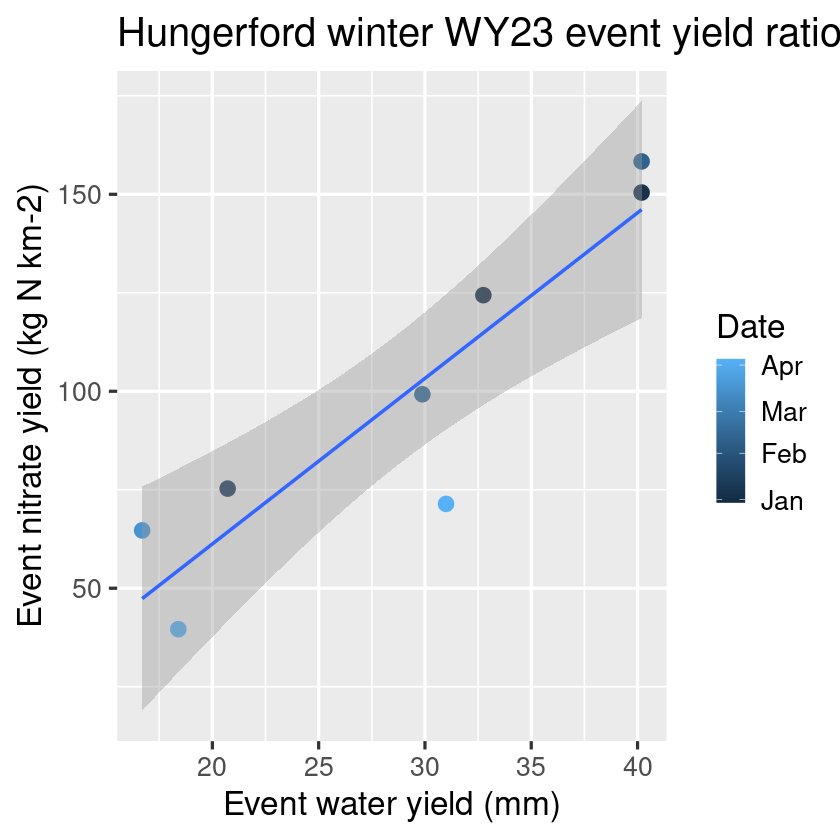

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”


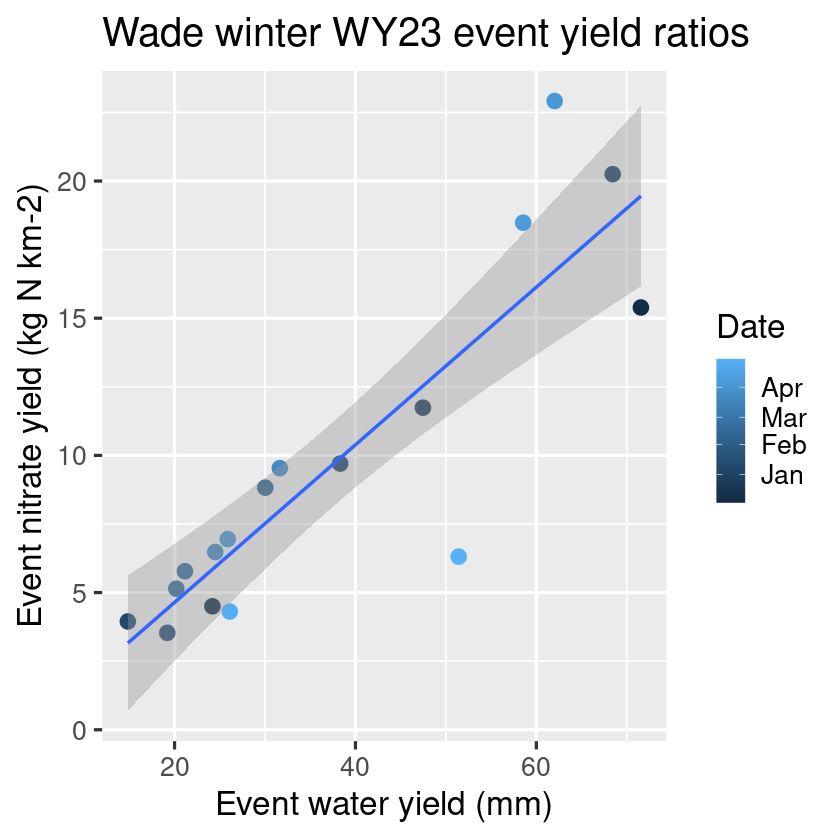

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”


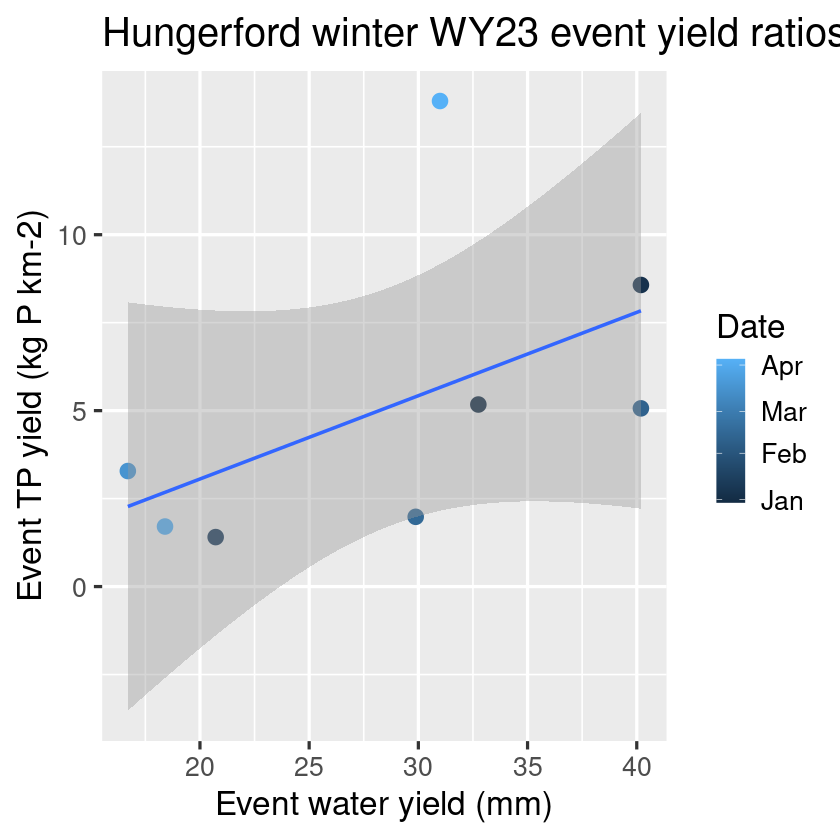

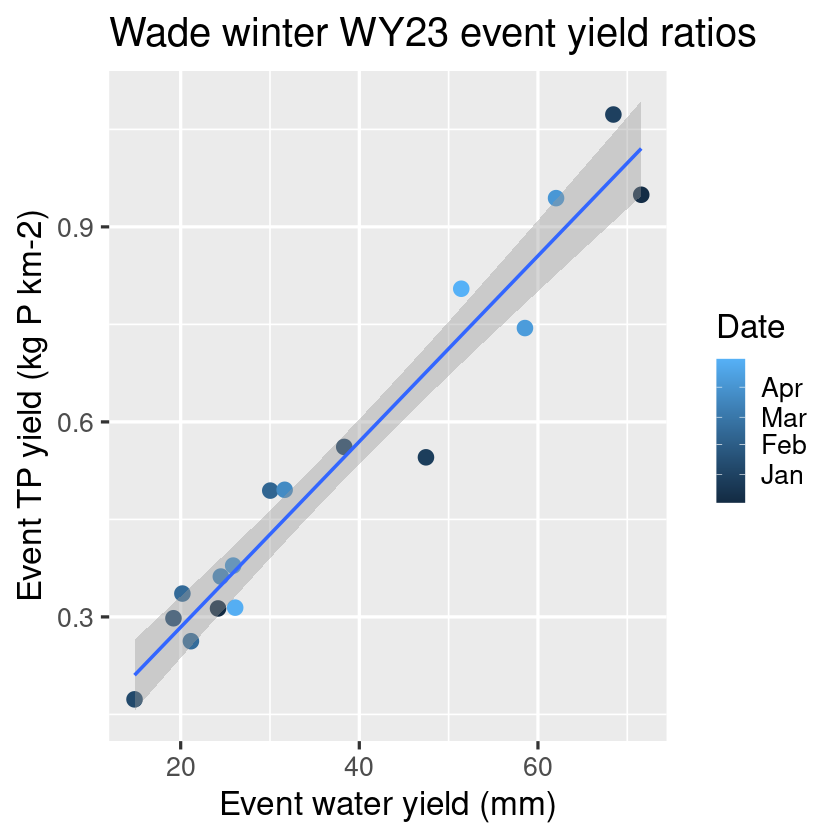

In [14]:
######################
# PLOT YIELD RATIOS #
#####################

ggplot(hungerford_yield_data_wy23, aes(x=water_yield_mm, y=NO3_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg N km-2)") +
    ggtitle("Hungerford winter WY23 event yield ratios") +
    theme_grey(base_size = 20)

ggplot(wade_yield_data_wy23, aes(x=water_yield_mm, y=NO3_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg N km-2)") +
    ggtitle("Wade winter WY23 event yield ratios") +
    theme_grey(base_size = 20)

######################
# PLOT YIELD RATIOS #
#####################

ggplot(hungerford_yield_data_wy23, aes(x=water_yield_mm, y=TP_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event TP yield (kg P km-2)") +
    ggtitle("Hungerford winter WY23 event yield ratios") +
    theme_grey(base_size = 20)

ggplot(wade_yield_data_wy23, aes(x=water_yield_mm, y=TP_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event TP yield (kg P km-2)") +
    ggtitle("Wade winter WY23 event yield ratios") +
    theme_grey(base_size = 20)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”


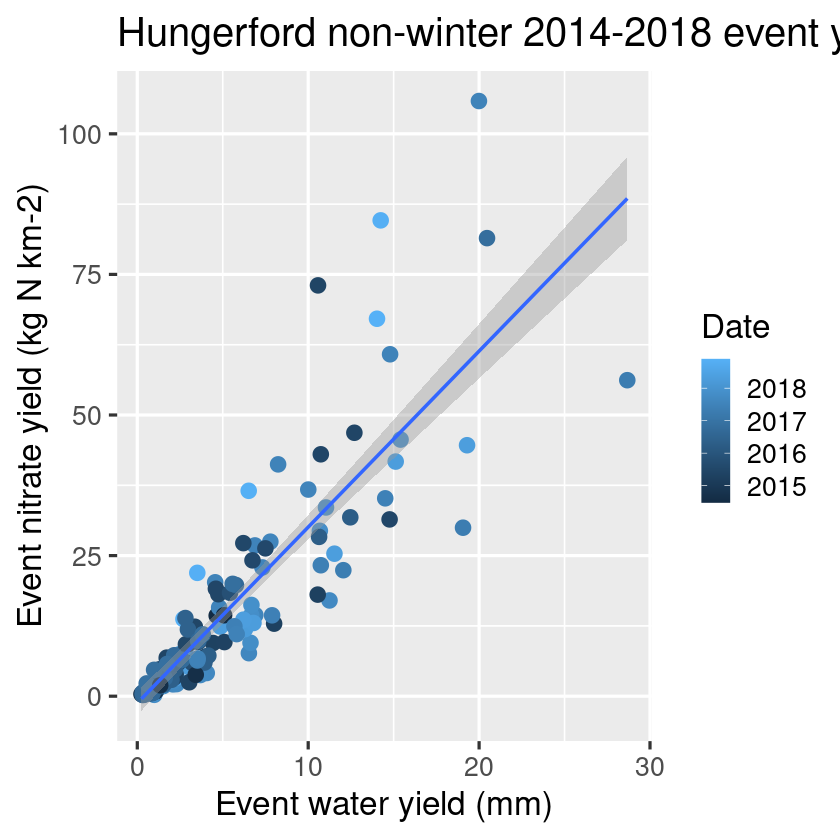

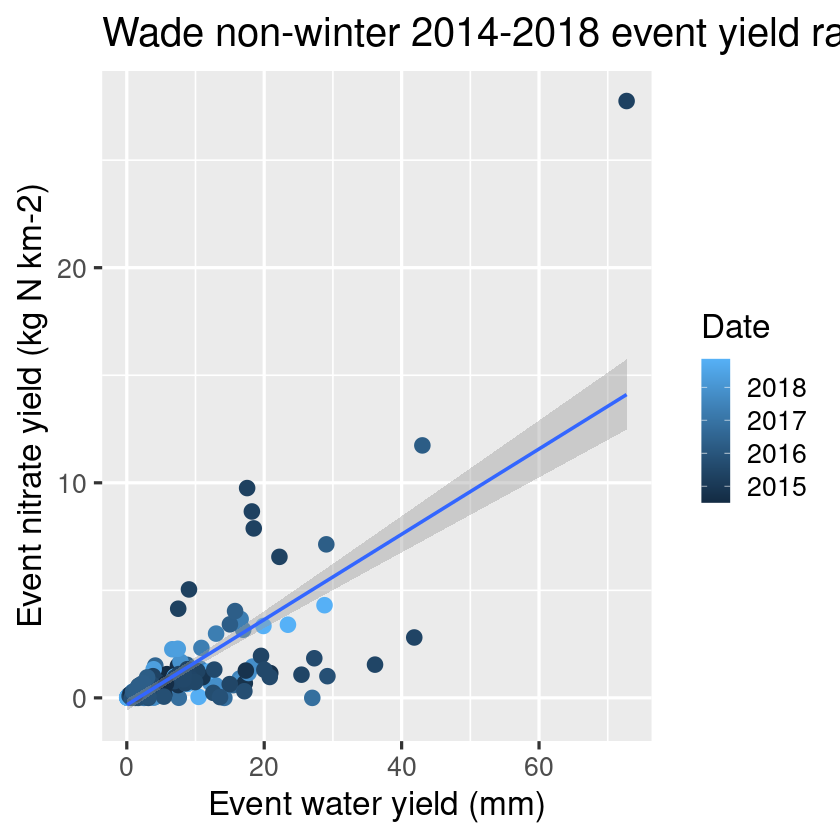

In [15]:
######################
# PLOT YIELD RATIOS #
#####################

ggplot(hungerford_yield_data_yearly, aes(x=water_yield_mm, y=constit_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg N km-2)") +
    ggtitle("Hungerford non-winter 2014-2018 event yield ratios") +
    theme_grey(base_size = 20)

ggplot(wade_yield_data_yearly, aes(x=water_yield_mm, y=constit_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg N km-2)") +
    ggtitle("Wade non-winter 2014-2018 event yield ratios") +
    theme_grey(base_size = 20)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”


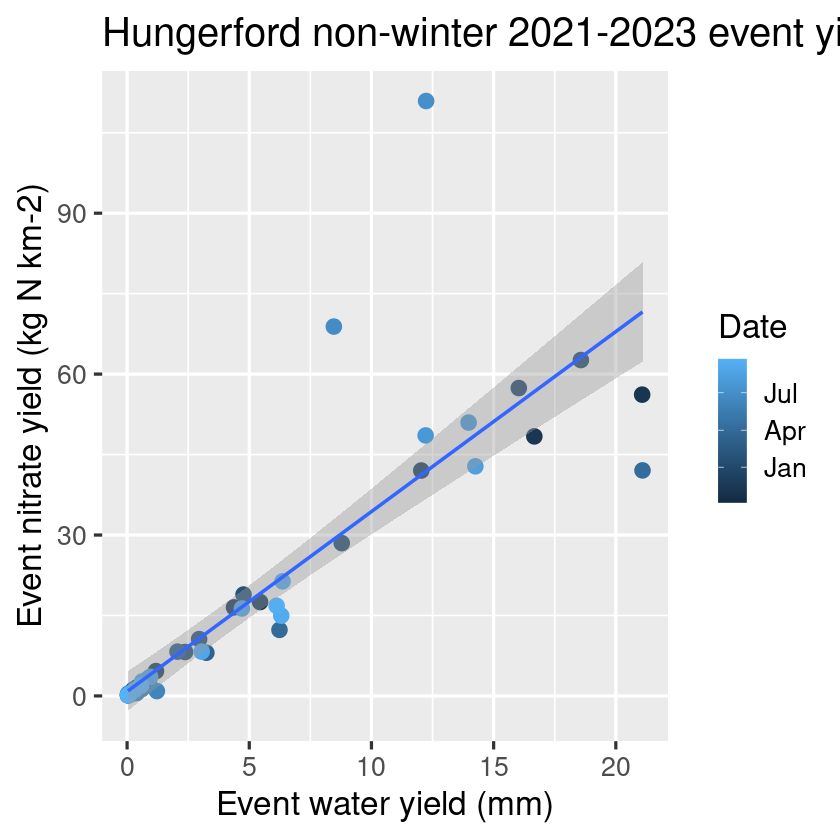

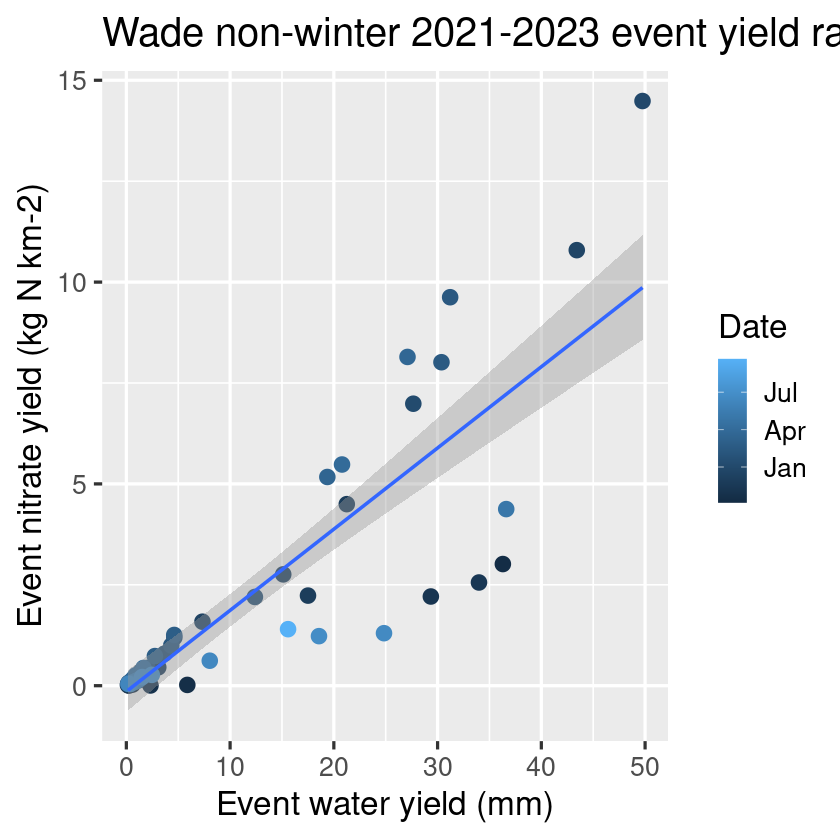

In [16]:
######################
# PLOT YIELD RATIOS #
#####################

ggplot(hungerford_yield_data_yearly_23, aes(x=water_yield_mm, y=constit_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg N km-2)") +
    ggtitle("Hungerford non-winter 2021-2023 event yield ratios") +
    theme_grey(base_size = 20)

ggplot(wade_yield_data_yearly_23, aes(x=water_yield_mm, y=constit_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg N km-2)") +
    ggtitle("Wade non-winter 2021-2023 event yield ratios") +
    theme_grey(base_size = 20)

In [17]:
# Load required packages
library(tidyverse)

# Combine winter and non-winter Hungerford 
hungerford_yield_data_wy23 <- hungerford_yield_data_wy23 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter")

#wade_yield_data_wy23 <- wade_yield_data_wy23 %>%
  #mutate(Site = "Wade") %>%
  #mutate(Season = "winter")

# Add non-winter Hungerford
hungerford_yield_data_yearly_23 <- hungerford_yield_data_yearly_23 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "non-winter")

#wade_yield_data_yearly <- wade_yield_data_yearly %>%
  #mutate(Site = "Wade") %>%
  #mutate(Season = "non-winter")

#combined_data <- bind_rows(hungerford_yield_data_wy23, wade_yield_data_wy23, hungerford_yield_data_yearly, wade_yield_data_yearly)
combined_data <- bind_rows(hungerford_yield_data_wy23, hungerford_yield_data_yearly_23)

# Fit linear models to calculate R² values
hungerford_winter_lm <- lm(constit_yield_mm ~ water_yield_mm, 
                    data = filter(combined_data, Season == "winter"))
hungerford_winter_r2 <- summary(hungerford_winter_lm)$r.squared

hungerford_nonwinter_lm <- lm(constit_yield_mm ~ water_yield_mm, 
              data = filter(combined_data, Season == "non-winter"))
hungerford_nonwinter_r2 <- summary(hungerford_nonwinter_lm)$r.squared

# Create the plot

options(repr.plot.width = 10, repr.plot.height = 10) 

ggplot(combined_data, aes(x = water_yield_mm, y = constit_yield_mm, color = Season)) +
  geom_point(size = 4, alpha = 0.8) +
  geom_smooth(method = lm, aes(linetype = Season)) +
  scale_color_manual(values = c("winter" = "#CD3333", "non-winter" = "black")) +
  labs(x = "Event water yield (mm)",
       y = "Event nitrate yield (kg NO3 km-2)",
       title = "Hungerford winter vs non-winter yield ratios") +
  xlim(0, 50) +
  ylim(0, 175) +
  theme_minimal(base_size = 20) +
  annotate("text", x = 10, y = 10, label = paste0("Winter event R²: ", round(hungerford_winter_r2, 3)), 
           color = "#CD3333", hjust = 0, size = 8) +
  annotate("text", x = 0, y = 130, label = paste0("Non-winter event R²: ", round(hungerford_nonwinter_r2, 3)), 
           color = "black", hjust = 0, size = 8)

ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): 0 (non-NA) cases


`geom_smooth()` using formula = 'y ~ x'


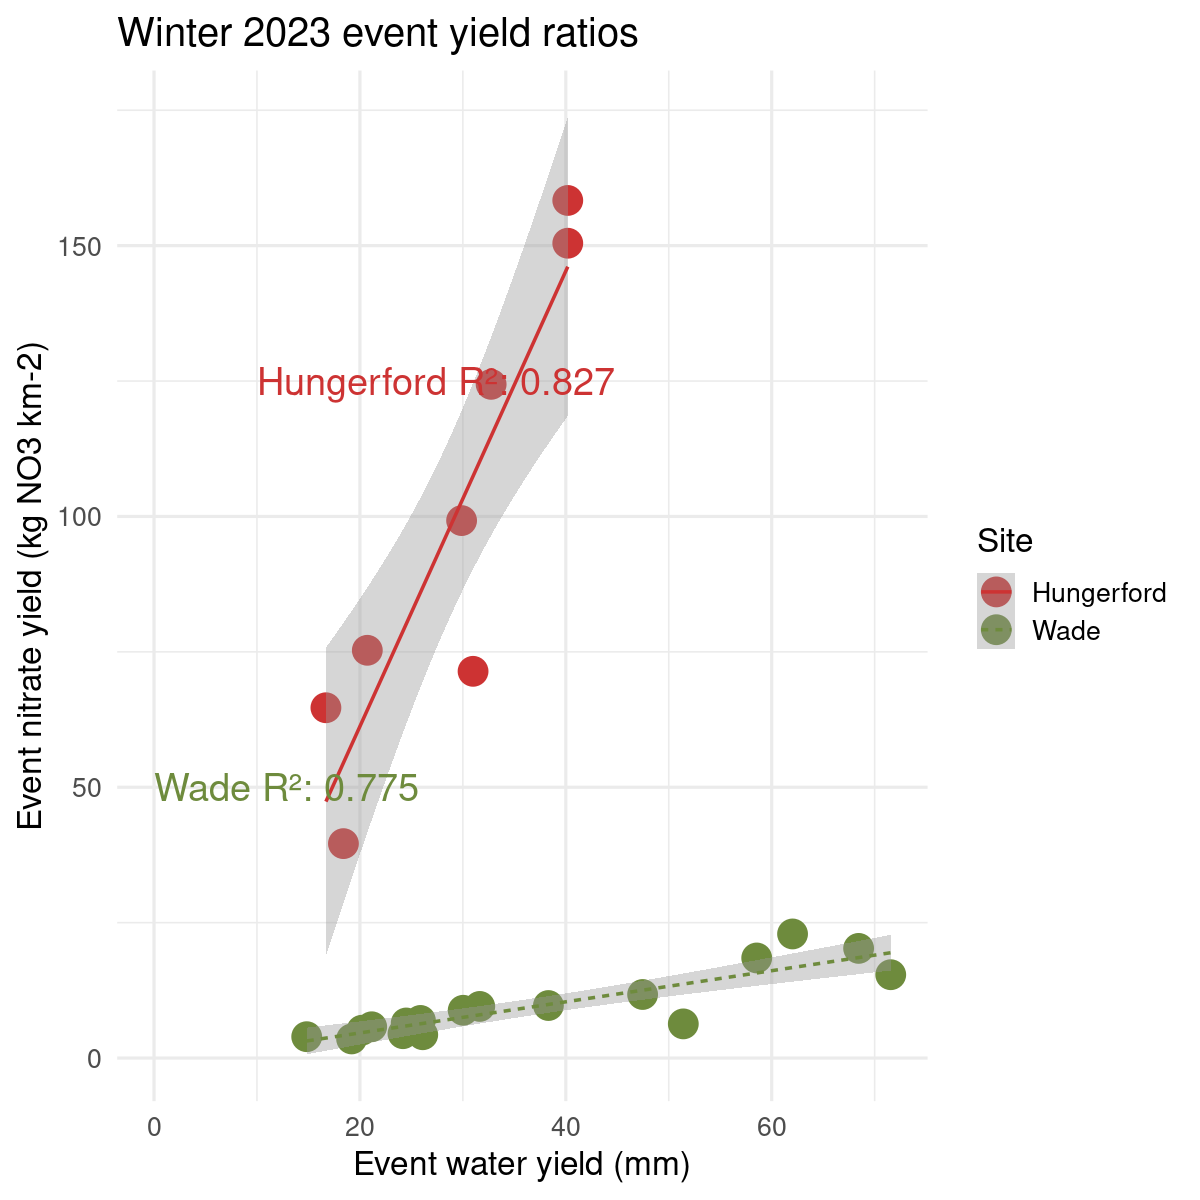

In [27]:
# Load required packages
library(tidyverse)

# Combine winter Hungerford and Wade data into a single data frame with a site identifier
hungerford_yield_data_wy23 <- hungerford_yield_data_wy23 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter")

wade_yield_data_wy23 <- wade_yield_data_wy23 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "winter")

# Add non-winter Hungerford and Wade data into a single data frame with a site identifier, too
hungerford_yield_data_yearly <- hungerford_yield_data_yearly %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "non-winter")

wade_yield_data_yearly <- wade_yield_data_yearly %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "non-winter")

#combined_data <- bind_rows(hungerford_yield_data_wy23, wade_yield_data_wy23, hungerford_yield_data_yearly, wade_yield_data_yearly)
combined_data <- bind_rows(hungerford_yield_data_wy23, wade_yield_data_wy23)

# Fit linear models to calculate R² values
hungerford_lm <- lm(constit_yield_mm ~ water_yield_mm, 
                    data = filter(combined_data, Site == "Hungerford"))
hungerford_r2 <- summary(hungerford_lm)$r.squared

wade_lm <- lm(constit_yield_mm ~ water_yield_mm, 
              data = filter(combined_data, Site == "Wade"))
wade_r2 <- summary(wade_lm)$r.squared

# Create the plot

options(repr.plot.width = 10, repr.plot.height = 10) 

ggplot(combined_data, aes(x = water_yield_mm, y = constit_yield_mm, color = Site)) +
  geom_point(size = 8) +
  geom_smooth(method = lm, aes(linetype = Site)) +
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  labs(x = "Event water yield (mm)",
       y = "Event nitrate yield (kg NO3 km-2)",
       title = "Winter 2023 event yield ratios") +
  #xlim(0, 125) +
  #ylim(0, 200) +
  theme_minimal(base_size = 20) +
  annotate("text", x = 10, y = 125, label = paste0("Hungerford R²: ", round(hungerford_r2, 3)), 
           color = "#CD3333", hjust = 0, size = 8) +
  annotate("text", x = 0, y = 50, label = paste0("Wade R²: ", round(wade_r2, 3)), 
           color = "darkolivegreen4", hjust = 0, size = 8)

In [18]:
# Load required packages
library(tidyverse)

# Combine winter and non-winter Hungerford 
hungerford_yield_data_wy23 <- hungerford_yield_data_wy23 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter")

wade_yield_data_wy23 <- wade_yield_data_wy23 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "winter")

# Add non-winter Hungerford
hungerford_yield_data_yearly_23 <- hungerford_yield_data_yearly_23 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "non-winter")

wade_yield_data_yearly_23 <- wade_yield_data_yearly_23 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "non-winter")

#combined_data_hungerford_23 <- bind_rows(hungerford_yield_data_wy23, hungerford_yield_data_yearly_23)
combined_data_wade_23 <- bind_rows(wade_yield_data_wy23, wade_yield_data_yearly_23)

# Fit linear models to calculate R² values
wade_winter_lm <- lm(constit_yield_mm ~ water_yield_mm, 
                    data = filter(combined_data_wade_23, Season == "winter"))
wade_winter_r2 <- summary(wade_winter_lm)$r.squared

wade_nonwinter_lm <- lm(constit_yield_mm ~ water_yield_mm, 
              data = filter(combined_data_wade_23, Season == "non-winter"))
wade_nonwinter_r2 <- summary(wade_nonwinter_lm)$r.squared

# Create the plot

options(repr.plot.width = 10, repr.plot.height = 10) 

ggplot(combined_data_wade_23, aes(x = water_yield_mm, y = constit_yield_mm, color = Season)) +
  geom_point(size = 4, alpha = 0.8) +
  geom_smooth(method = lm, aes(linetype = Season)) +
  scale_color_manual(values = c("winter" = "darkolivegreen4", "non-winter" = "black")) +
  labs(x = "Event water yield (mm)",
       y = "Event nitrate yield (kg NO3 km-2)",
       title = "Wade winter vs non-winter yield ratios") +
  #xlim(0, 70) +
  #ylim(0, 30) +
  theme_minimal(base_size = 20) +
  annotate("text", x = 10, y = 20, label = paste0("Winter event R²: ", round(wade_winter_r2, 3)), 
           color = "darkolivegreen4", hjust = 0, size = 8) +
  annotate("text", x = 20, y = 0.5, label = paste0("Non-winter event R²: ", round(wade_nonwinter_r2, 3)), 
           color = "black", hjust = 0, size = 8)

ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): 0 (non-NA) cases


`geom_smooth()` using formula = 'y ~ x'


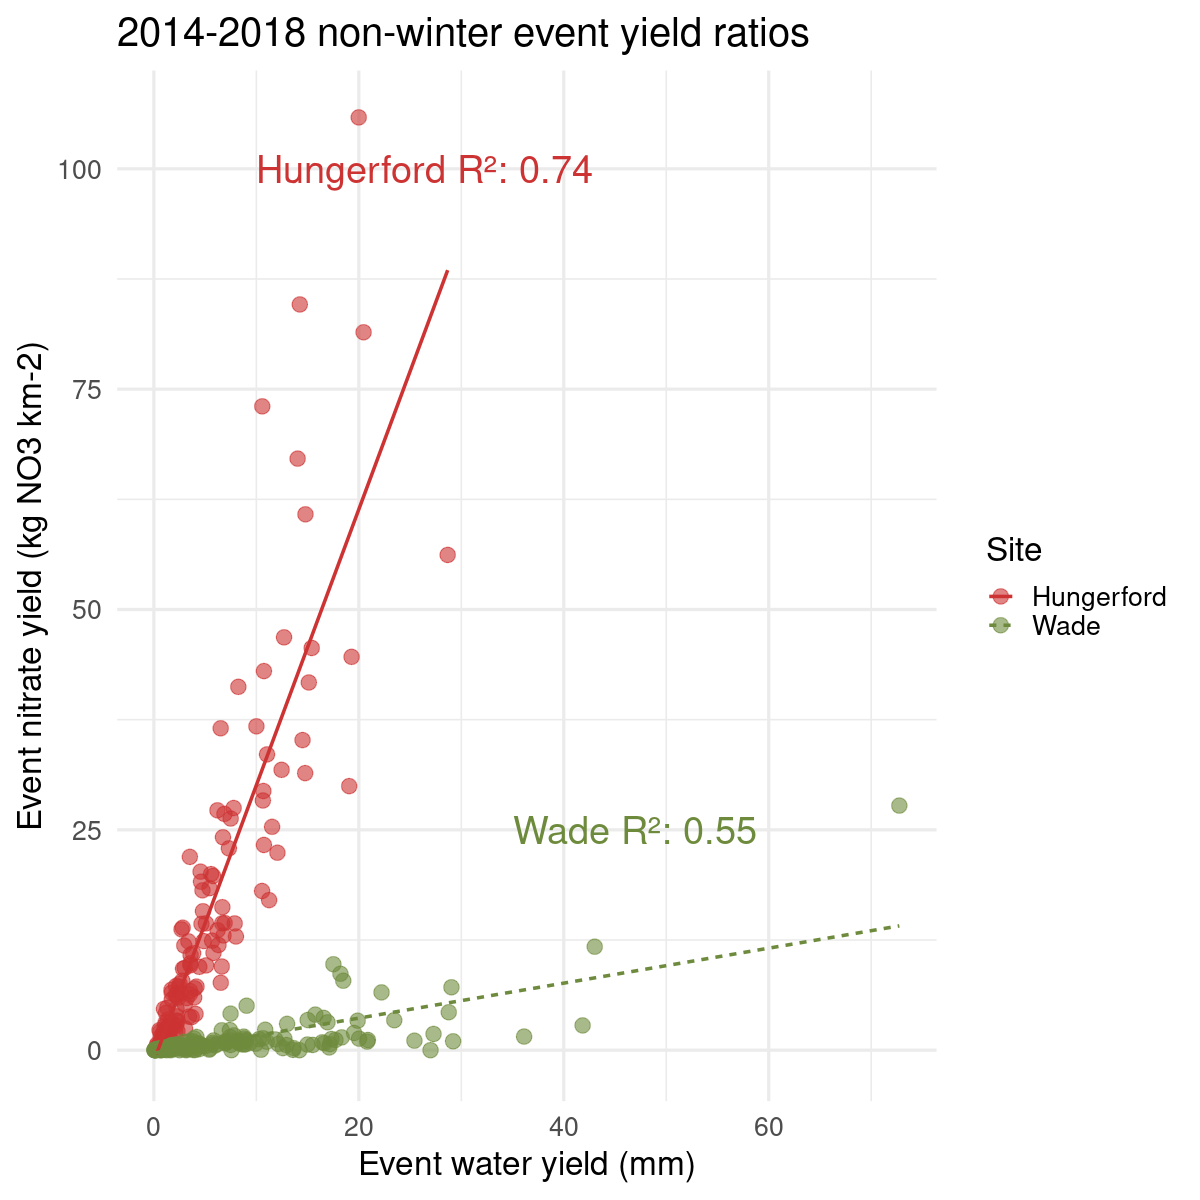

In [37]:
# Load required packages
library(tidyverse)

# Combine winter Hungerford and Wade data into a single data frame with a site identifier
hungerford_yield_data_wy23 <- hungerford_yield_data_wy23 %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "winter")

wade_yield_data_wy23 <- wade_yield_data_wy23 %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "winter")

# Add non-winter Hungerford and Wade data into a single data frame with a site identifier, too
hungerford_yield_data_yearly <- hungerford_yield_data_yearly %>%
  mutate(Site = "Hungerford") %>%
  mutate(Season = "non-winter")

wade_yield_data_yearly <- wade_yield_data_yearly %>%
  mutate(Site = "Wade") %>%
  mutate(Season = "non-winter")

#combined_data <- bind_rows(hungerford_yield_data_wy23, wade_yield_data_wy23, hungerford_yield_data_yearly, wade_yield_data_yearly)
combined_data <- bind_rows(hungerford_yield_data_yearly, wade_yield_data_yearly)

# Fit linear models to calculate R² values
hungerford_lm <- lm(constit_yield_mm ~ water_yield_mm, 
                    data = filter(combined_data, Site == "Hungerford"))
hungerford_r2 <- summary(hungerford_lm)$r.squared

wade_lm <- lm(constit_yield_mm ~ water_yield_mm, 
              data = filter(combined_data, Site == "Wade"))
wade_r2 <- summary(wade_lm)$r.squared

# Create the plot

options(repr.plot.width = 10, repr.plot.height = 10) 

ggplot(combined_data, aes(x = water_yield_mm, y = constit_yield_mm, color = Site)) +
  geom_point(size = 4, alpha = 0.6) +
  geom_smooth(method = lm, se = FALSE, aes(linetype = Site)) +
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  labs(x = "Event water yield (mm)",
       y = "Event nitrate yield (kg NO3 km-2)",
       title = "2014-2018 non-winter event yield ratios") +
  #xlim(0, 125) +
  #ylim(0, 475) +
  theme_minimal(base_size = 20) +
  annotate("text", x = 10, y = 100, label = paste0("Hungerford R²: ", round(hungerford_r2, 2)), 
           color = "#CD3333", hjust = 0, size = 8) +
  annotate("text", x = 35, y = 25, label = paste0("Wade R²: ", round(wade_r2, 2)), 
           color = "darkolivegreen4", hjust = 0, size = 8)

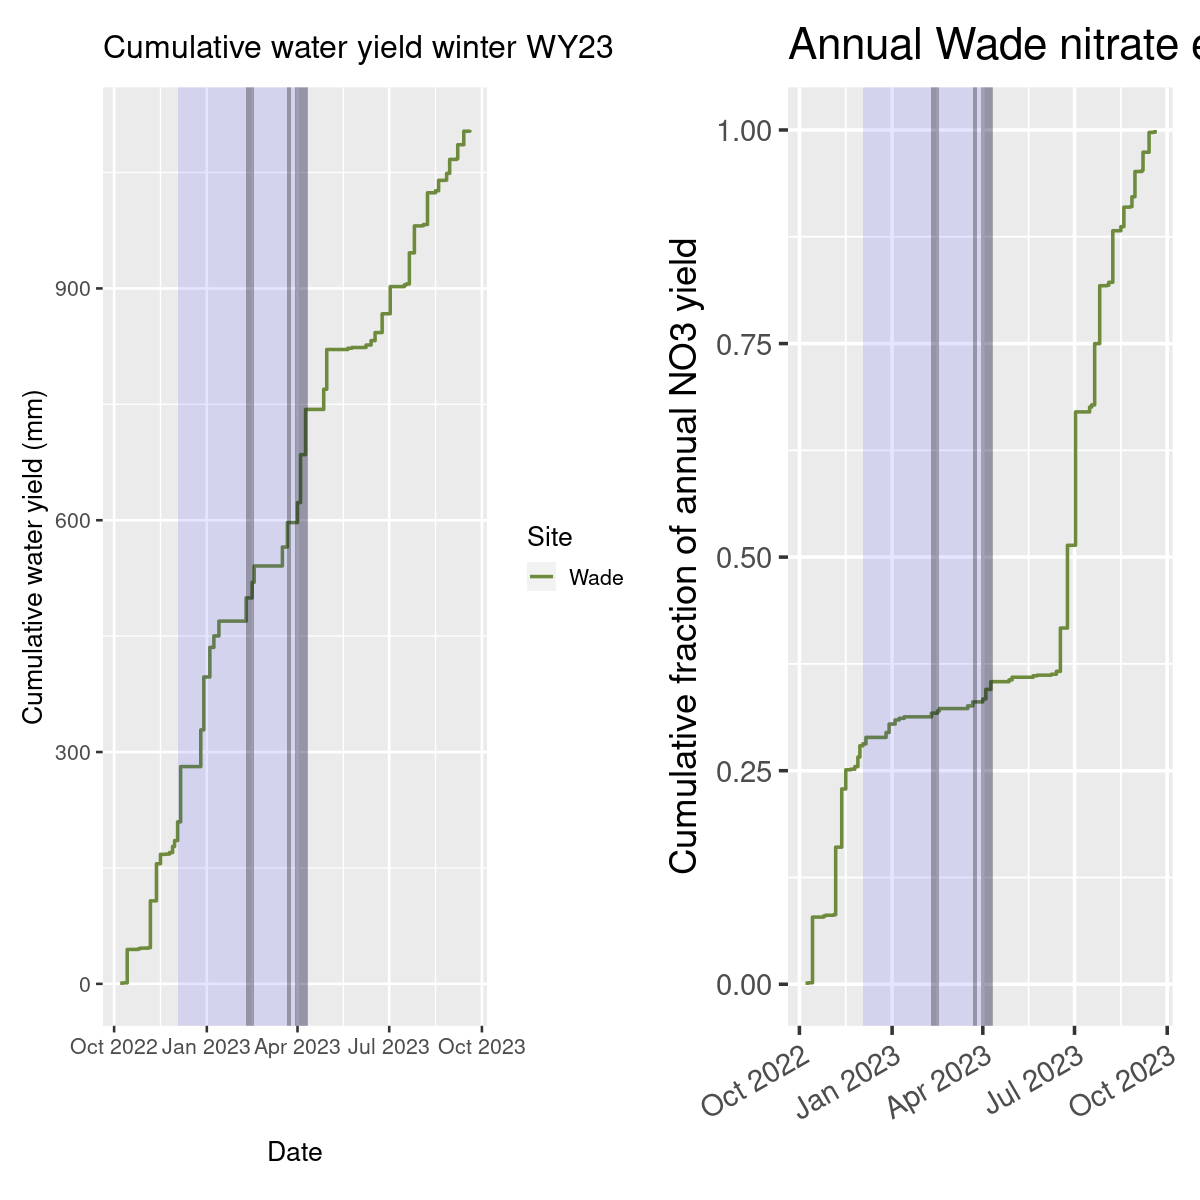

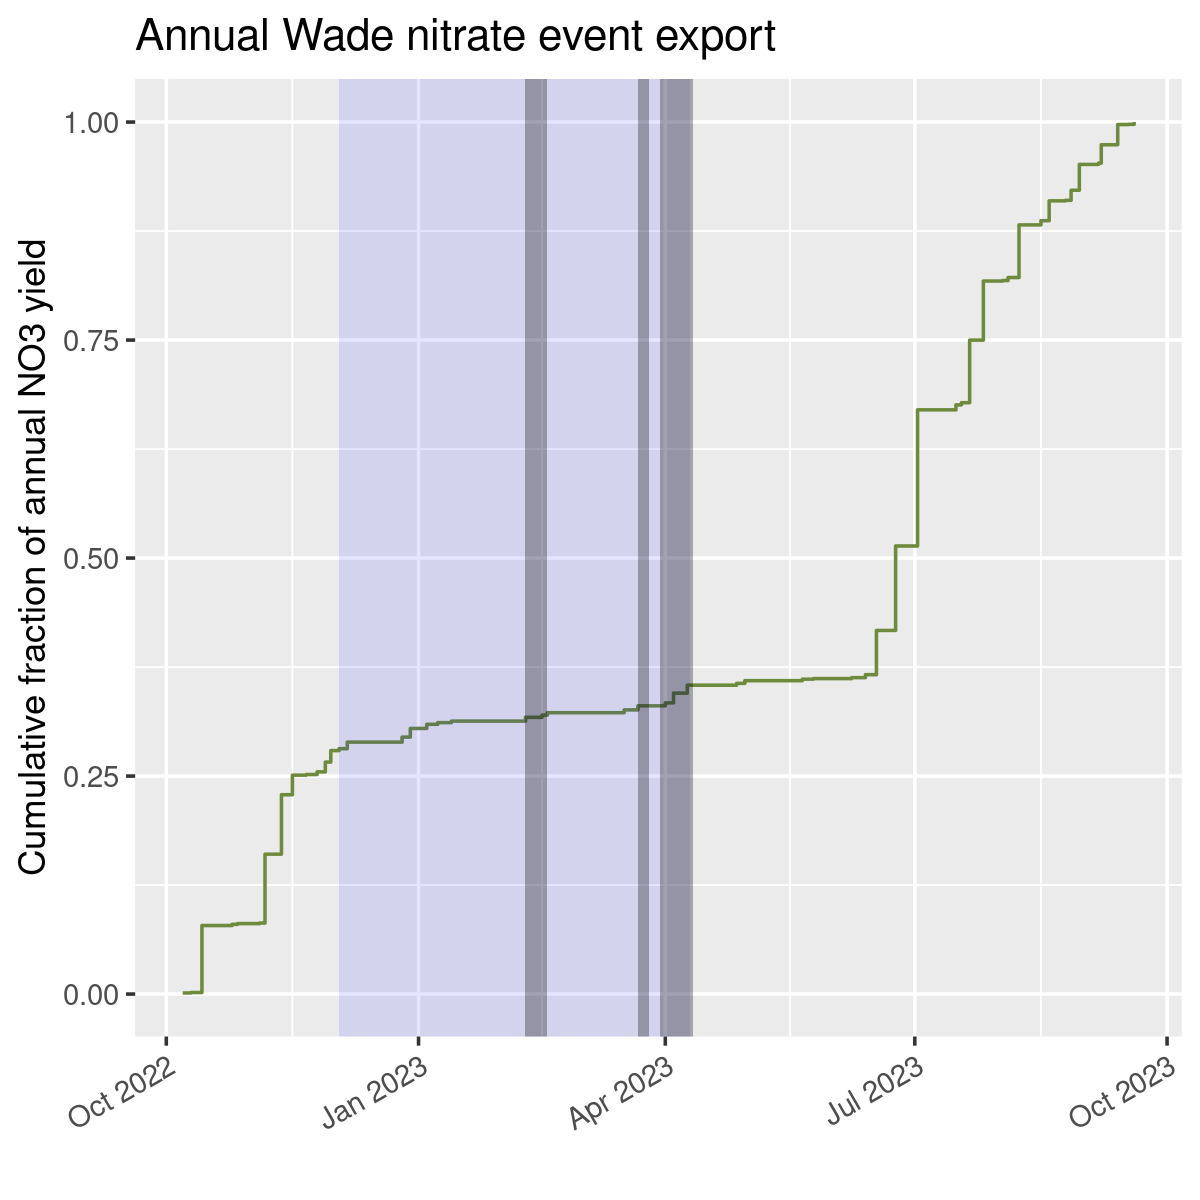

In [21]:
# Define the sampling date ranges
sampling_ranges <- data.frame(
  xmin = as.Date(c("2023-02-09", "2023-03-22", "2023-03-30")),
  xmax = as.Date(c("2023-02-17", "2023-03-26", "2023-04-11"))
)

# Define ice-on
ice_on <- data.frame(
  xmin = as.Date(c("2022-12-03")),
  xmax = as.Date(c("2023-04-10"))
)

# Add cumulative sums grouped by site
combined_data_wade_23 <- combined_data_wade_23 %>%
  arrange(Site, Date) %>%  # Ensure data is ordered by site and date
  group_by(Site) %>%
  mutate(cumulative_water_yield = cumsum(water_yield_mm),
         cumulative_constit_yield = cumsum(constit_yield_mm)) %>%
  mutate(percent_cum_water_yield = cumsum(water_yield_mm)/sum(water_yield_mm),
        percent_cum_nitrate_yield = cumsum(constit_yield_mm)/sum(constit_yield_mm)) %>%
  ungroup()

options(repr.plot.width = 10, repr.plot.height = 10) 

# Plot for cumulative water yield
p1 <- ggplot(combined_data_wade_23, aes(x = Date, y = cumulative_water_yield, color = Site)) +
  geom_step(size = 1) +  # Stepwise line
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  # Add shaded bands for sampling and ice-on
  geom_rect(data = ice_on, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "blue", alpha = 0.1, inherit.aes = FALSE) +
  geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "black", alpha = 0.3, inherit.aes = FALSE) +
  labs(x = "Date",
       y = "Cumulative water yield (mm)",
       title = "Cumulative water yield winter WY23") +
  theme_grey(base_size = 16)

# Plot for cumulative nitrate yield
p2 <- ggplot(combined_data_wade_23, aes(x = Date, y = percent_cum_nitrate_yield, color = Site)) +
  geom_step(size = 1) +  # Stepwise line
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  # Add shaded bands for sampling and ice-on
  geom_rect(data = ice_on, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "blue", alpha = 0.1, inherit.aes = FALSE) +
  geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "black", alpha = 0.3, inherit.aes = FALSE) +
  labs(x = "",
       #y = "Cumulative NO3 yield (kg NO3 km-2)",
       y = "Cumulative fraction of annual NO3 yield",
       title = "Annual Wade nitrate event export") +
  theme_grey(base_size = 22) +
  theme(legend.position="none") +
  theme(axis.text.x = element_text(angle = 30, hjust=1))

# Combine the two plots side-by-side
library(patchwork)
p1 + p2

ggsave(plot = p1, width = 10, height = 10, dpi = 300, filename = "wade_WY23_wateryield.png")
ggsave(plot = p2, width = 10, height = 10, dpi = 300, filename = "wade_WY23_nitrateyield.png")

print(p2)

In [23]:
# Define the sampling date ranges
sampling_ranges <- data.frame(
  xmin = as.Date(c("2023-02-09", "2023-03-22", "2023-03-30")),
  xmax = as.Date(c("2023-02-17", "2023-03-26", "2023-04-11"))
)

# Define ice-on
ice_on <- data.frame(
  xmin = as.Date(c("2022-12-03")),
  xmax = as.Date(c("2023-04-01"))
)

# Add cumulative sums grouped by site
combined_data_hungerford_23 <- combined_data_hungerford_23 %>%
  arrange(Site, Date) %>%  # Ensure data is ordered by site and date
  group_by(Site) %>%
  mutate(cumulative_water_yield = cumsum(water_yield_mm),
         cumulative_constit_yield = cumsum(constit_yield_mm)) %>%
  mutate(percent_cum_water_yield = cumsum(water_yield_mm)/sum(water_yield_mm),
        percent_cum_nitrate_yield = cumsum(constit_yield_mm)/sum(constit_yield_mm)) %>%
  ungroup()

options(repr.plot.width = 10, repr.plot.height = 10) 

# Plot for cumulative water yield
p1 <- ggplot(combined_data_hungerford_23, aes(x = Date, y = cumulative_water_yield, color = Site)) +
  geom_step(size = 1) +  # Stepwise line
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  # Add shaded bands
  geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "grey", alpha = 0.7, inherit.aes = FALSE) +
  labs(x = "Date",
       y = "Cumulative water yield (mm)",
       title = "Cumulative water yield winter WY23") +
  theme_grey(base_size = 16)

# Plot for cumulative nitrate yield
p2 <- ggplot(combined_data_hungerford_23, aes(x = Date, y = percent_cum_nitrate_yield, color = Site)) +
  geom_step(size = 1) +  # Stepwise line
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  # Add shaded bands for sampling and ice-on
  geom_rect(data = ice_on, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "blue", alpha = 0.1, inherit.aes = FALSE) +
  geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "black", alpha = 0.3, inherit.aes = FALSE) +
  labs(x = "",
       #y = "Cumulative NO3 yield (kg NO3 km-2)",
       y = "Cumulative fraction of annual NO3 yield",
       title = "Annual Hungerford nitrate event export") +
  theme_grey(base_size = 22) +
  theme(legend.position="none") +
  theme(axis.text.x = element_text(angle = 30, hjust=1))

# Combine the two plots side-by-side
library(patchwork)
p1 + p2

ggsave(plot = p1, width = 10, height = 10, dpi = 300, filename = "hungerford_WY23_wateryield.png")
ggsave(plot = p2, width = 10, height = 10, dpi = 300, filename = "hungerford_WY23_nitrateyield.png")

print(p2)

ERROR: Error in arrange(., Site, Date): object 'combined_data_hungerford_23' not found


# Soil resin NO3 availability

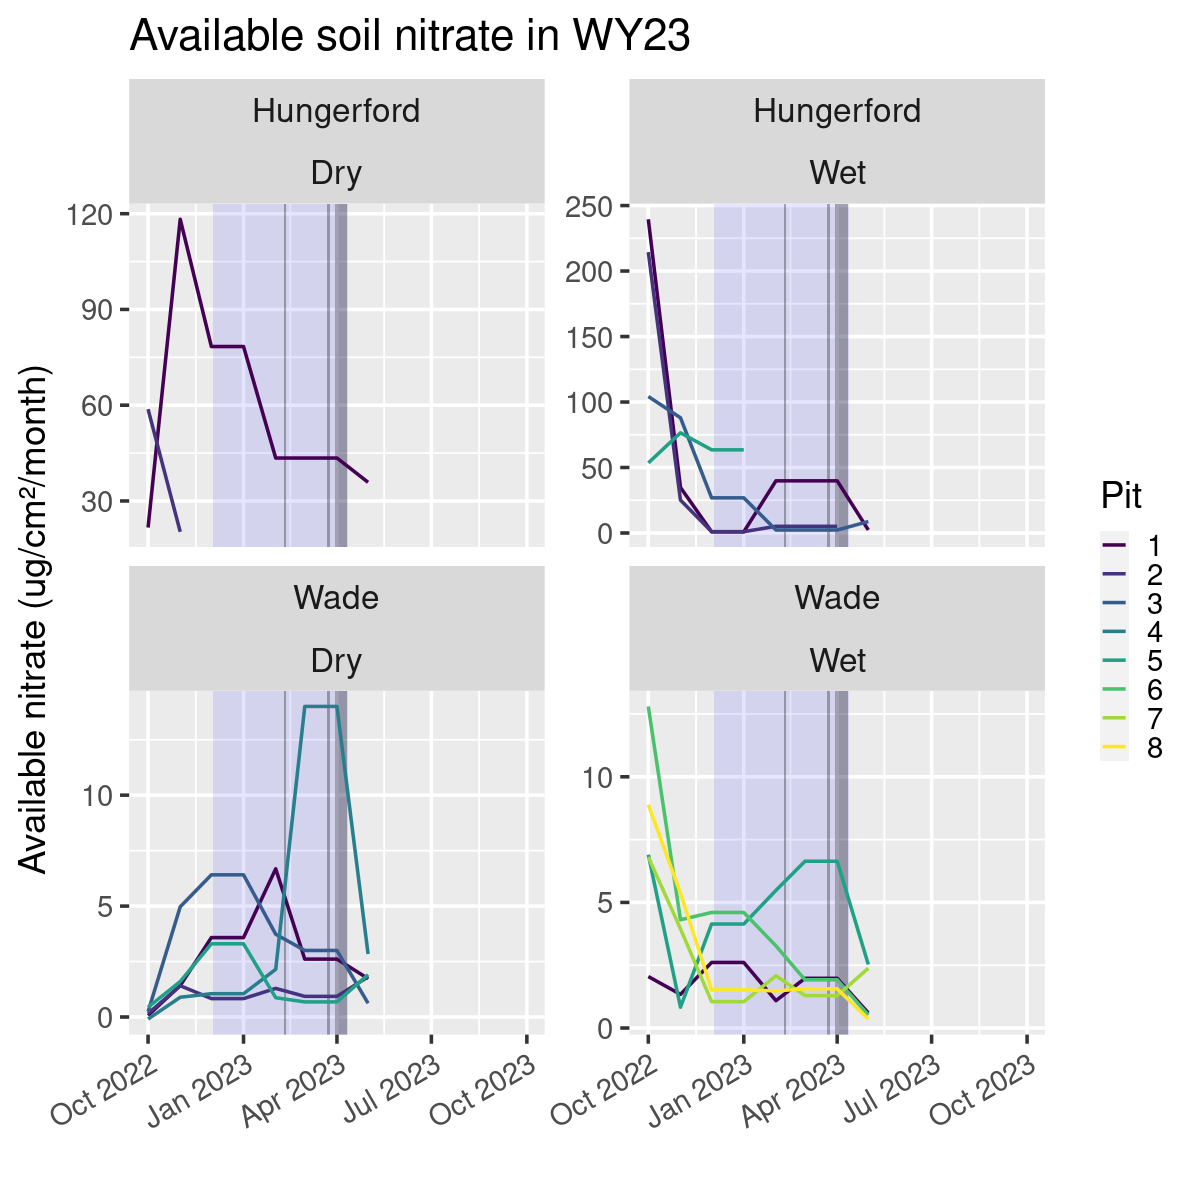

In [15]:
##### Plot soil available NO3 for all Stream transects

# Define ice-on
ice_on <- data.frame(
  xmin = as.Date(c("2022-12-03")),
  xmax = as.Date(c("2023-04-12"))
)

# Filter data for Nitrate species
nitrate_data <- resin_data_wy23 %>%
  filter(Species == "Nitrate") %>%
  arrange(Site, Transect, Pit, Date) %>%
  group_by(Site, Transect, Pit) %>%
  mutate(cumulative_ug_cm2 = cumsum(ug_cm2_month)) %>%
  ungroup()

# Define the sampling date ranges for shading
sampling_ranges <- data.frame(
  xmin = as.Date(c("2023-02-09", "2023-03-22", "2023-03-30")),
  xmax = as.Date(c("2023-02-11", "2023-03-25", "2023-04-11"))
)

# Plotting ranges
plotting_ranges <- data.frame(
  xmin = as.Date(c("2022-10-01")),
  xmax = as.Date(c("2023-09-30"))
)

# Plot cumulative nitrate with faceting and line color by Pit
p <- ggplot(nitrate_data, aes(x = Date, y = ug_cm2_month, color = factor(Pit))) +
  # Add shaded bands for sampling and ice-on
  geom_rect(data = ice_on, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "blue", alpha = 0.1, inherit.aes = FALSE) +
  geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "black", alpha = 0.3, inherit.aes = FALSE) +
  geom_line(size = 1) +  # Line plot for cumulative nitrate
  facet_wrap(~ Site + Transect, scales = "free_y") +  # Facet by Site and Transect
  scale_color_viridis_d(name = "Pit") +  # Use a color palette for Pit
  labs(x = "",
       y = "Available nitrate (ug/cm²/month)",
       title = "Available soil nitrate in WY23") +
  scale_x_date(limits = as.Date(c("2022-10-01", "2023-09-30"))) +
  #annotate("text", x = as.Date(c("2022-01-01")), y = 10, label = "soil resin data not yet analyzed"), 
           #color = "darkolivegreen4", hjust = 0, size = 8) +
  theme_grey(base_size = 22) +
  theme(axis.text.x = element_text(angle = 30, hjust=1)) +
  theme(strip.text.x = element_text(size = 20))  # Adjust facet label font size for readability

# Display the plot
print(p)

# Optionally save the plot
#ggsave(plot = p, width = 24, height = 10, dpi = 300, filename = "cumulative_nitrate_faceted.png")


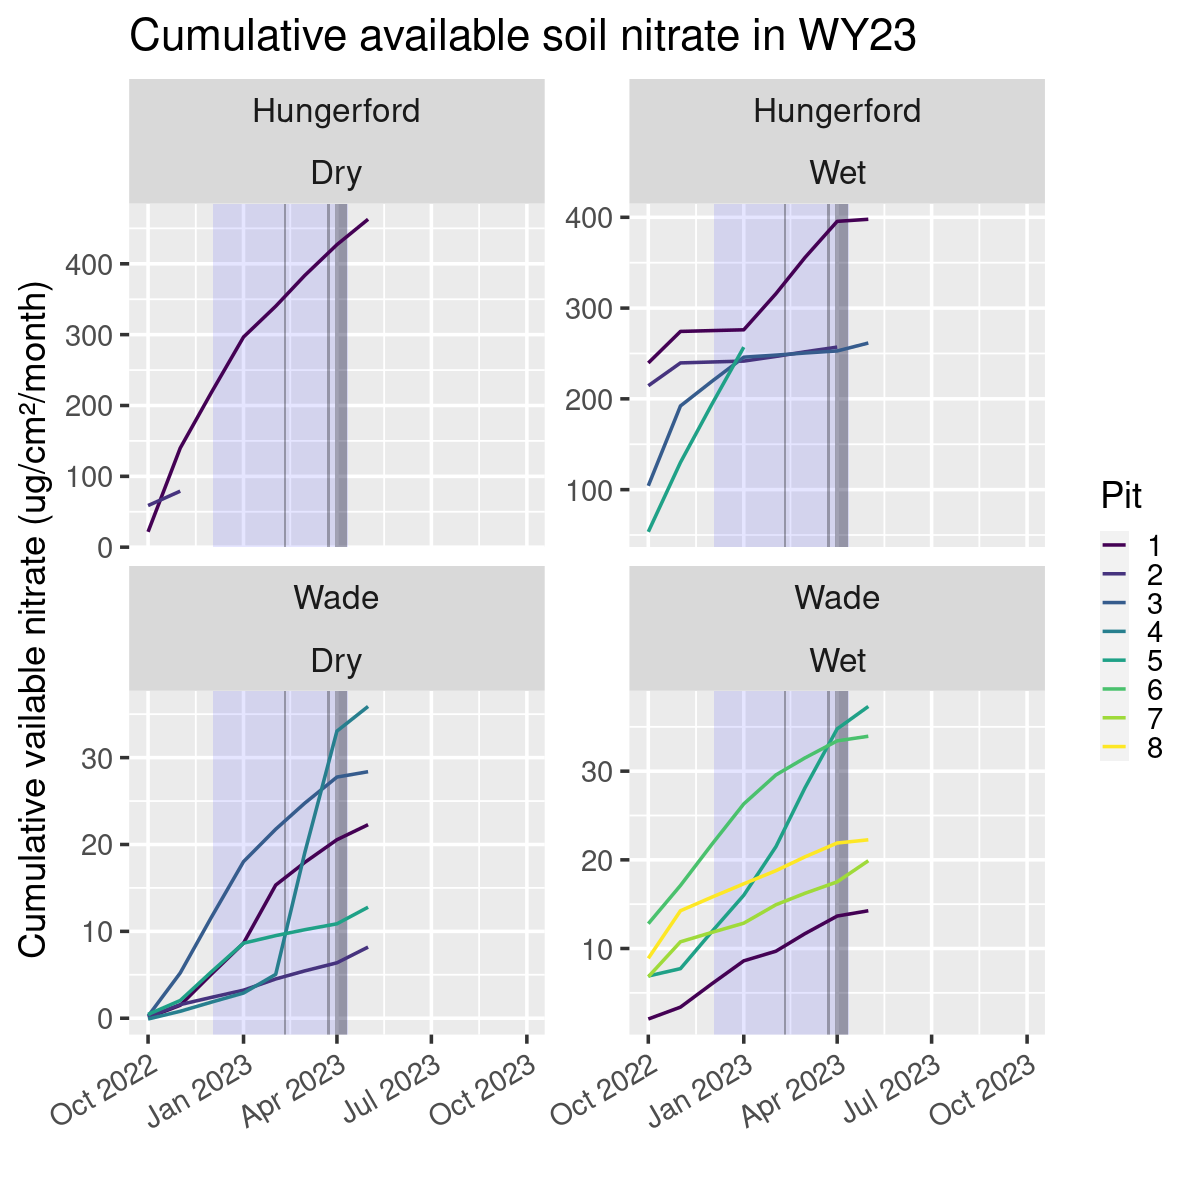

In [16]:
##### Plot soil available NO3 for all Stream transects

# Define ice-on
ice_on <- data.frame(
  xmin = as.Date(c("2022-12-03")),
  xmax = as.Date(c("2023-04-12"))
)

# Filter data for Nitrate species
nitrate_data <- resin_data_wy23 %>%
  filter(Species == "Nitrate") %>%
  arrange(Site, Transect, Pit, Date) %>%
  group_by(Site, Transect, Pit) %>%
  mutate(cumulative_ug_cm2 = cumsum(ug_cm2_month)) %>%
  ungroup()

# Define the sampling date ranges for shading
sampling_ranges <- data.frame(
  xmin = as.Date(c("2023-02-09", "2023-03-22", "2023-03-30")),
  xmax = as.Date(c("2023-02-11", "2023-03-25", "2023-04-11"))
)

# Plotting ranges
plotting_ranges <- data.frame(
  xmin = as.Date(c("2022-10-01")),
  xmax = as.Date(c("2023-09-30"))
)

# Plot cumulative nitrate with faceting and line color by Pit
p <- ggplot(nitrate_data, aes(x = Date, y = cumulative_ug_cm2, color = factor(Pit))) +
  # Add shaded bands for sampling and ice-on
  geom_rect(data = ice_on, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "blue", alpha = 0.1, inherit.aes = FALSE) +
  geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "black", alpha = 0.3, inherit.aes = FALSE) +
  geom_line(size = 1) +  # Line plot for cumulative nitrate
  facet_wrap(~ Site + Transect, scales = "free_y") +  # Facet by Site and Transect
  scale_color_viridis_d(name = "Pit") +  # Use a color palette for Pit
  labs(x = "",
       y = "Cumulative vailable nitrate (ug/cm²/month)",
       title = "Cumulative available soil nitrate in WY23") +
  scale_x_date(limits = as.Date(c("2022-10-01", "2023-09-30"))) +
  #annotate("text", x = as.Date(c("2022-01-01")), y = 10, label = "soil resin data not yet analyzed"), 
           #color = "darkolivegreen4", hjust = 0, size = 8) +
  theme_grey(base_size = 22) +
  theme(axis.text.x = element_text(angle = 30, hjust=1)) +
  theme(strip.text.x = element_text(size = 20))  # Adjust facet label font size for readability

# Display the plot
print(p)

# Optionally save the plot
#ggsave(plot = p, width = 24, height = 10, dpi = 300, filename = "cumulative_nitrate_faceted.png")


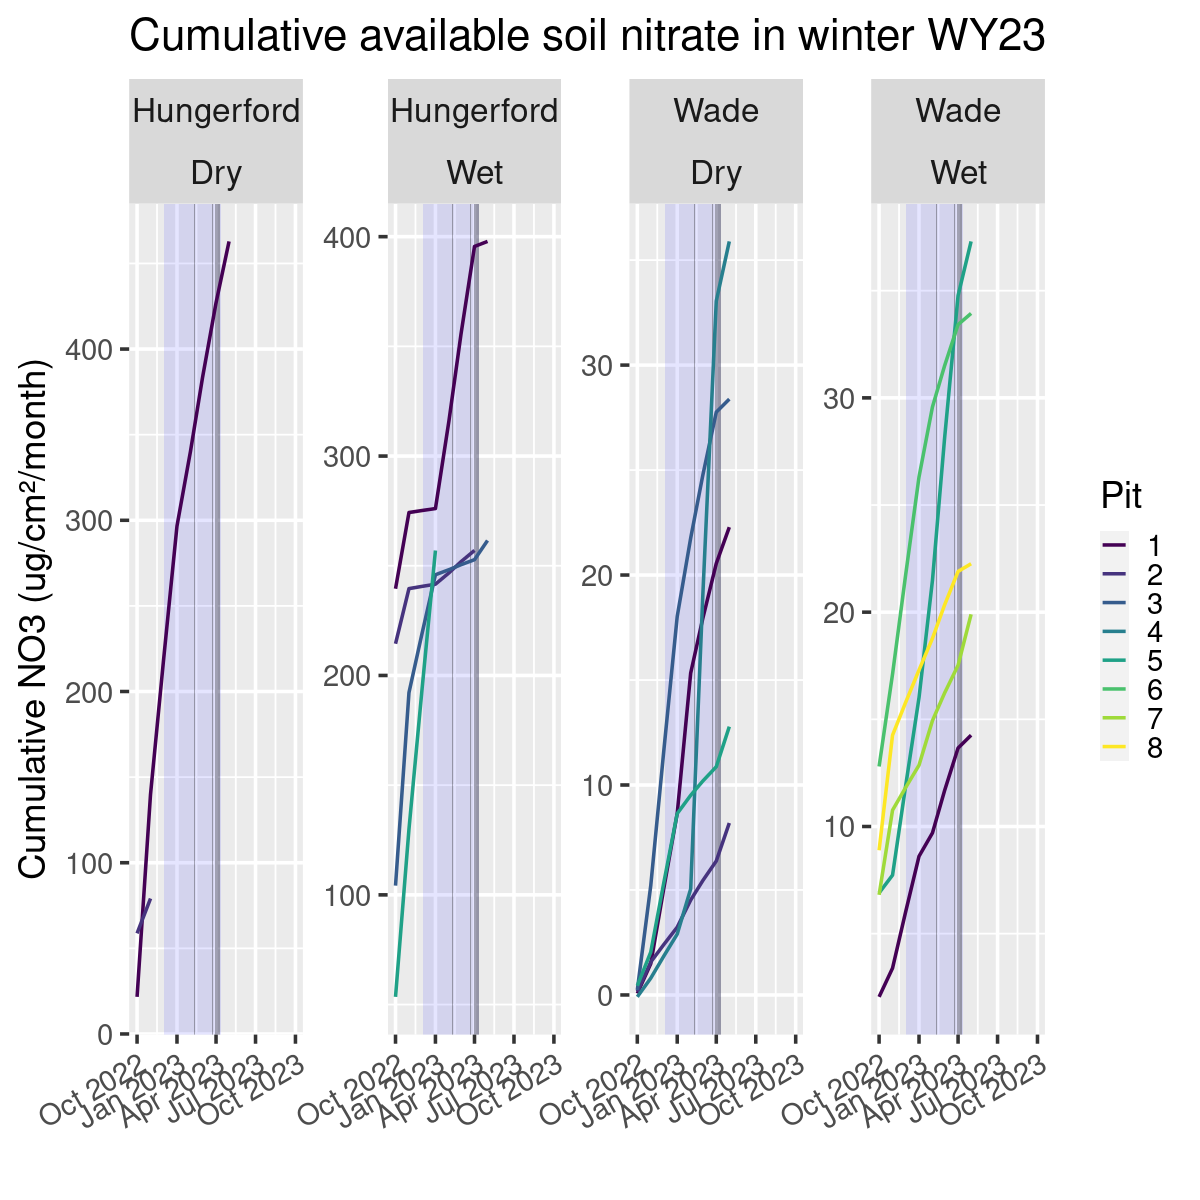

In [81]:
# Plot cumulative nitrate with faceting in a 1x4 layout and line color by Pit
p <- ggplot(nitrate_data, aes(x = Date, y = cumulative_ug_cm2, color = factor(Pit))) +
  # Add shaded bands for sampling and ice-on
  geom_rect(data = ice_on, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "blue", alpha = 0.1, inherit.aes = FALSE) +
  geom_rect(data = sampling_ranges, aes(xmin = xmin, xmax = xmax, ymin = -Inf, ymax = Inf), 
            fill = "black", alpha = 0.3, inherit.aes = FALSE) +
  geom_line(size = 1) +  # Line plot for cumulative nitrate
  facet_wrap(~ Site + Transect, scales = "free_y", nrow = 1) +  # Adjusted to 1 row
  scale_color_viridis_d(name = "Pit") +  # Use a color palette for Pit
  labs(x = "",
       y = "Cumulative NO3 (ug/cm²/month)",
       title = "Cumulative available soil nitrate in winter WY23") +
  scale_x_date(limits = as.Date(c("2022-10-01", "2023-09-30"))) +
  theme_grey(base_size = 22) +
  theme(axis.text.x = element_text(angle = 30, hjust=1)) +
  theme(strip.text.x = element_text(size = 20))  # Adjust facet label font size for readability

# Display the plot
print(p)

# Optionally save the plot
ggsave(plot = p, width = 18, height = 6, dpi = 300, filename = "cumulative_nitrate_faceted_horizontal.png")


FOr WY22

In [ ]:
################
# LOAD PACKAGES #
################

library(tidyverse)
library(viridis)
library(lubridate)
library(patchwork)

###################
# SET DIRECTORIES #
###################

setwd("~//OneDrive/git-repos/EMMA")

input_dir <- "soil-resins/"
output_dir <- "soil-resins/output"
# event delineation script puts original yields here:

# I've put some here for now:
yield_input_dir <- "soil-resins/"

###########################
# READ IN AND FILTER DATA #
###########################

# Read in cumulative NO3 data
hungerford_yield_data <- read.csv(file.path(yield_input_dir, "Hungerford_WY22_WY23_storm_NO3_yields.csv")) %>%
  mutate(Date = as.Date(start))  # Convert 'start' to Date format (drop time)

wade_yield_data <- read.csv(file.path(yield_input_dir, "Wade_WY22_WY23_storm_NO3_yields.csv")) %>%
  mutate(Date = as.Date(start))  # Convert 'start' to Date format (drop time)

# Define Water Year 2022
wy22_start <- as.Date("2021-10-01")
wy22_end <- as.Date("2022-09-30")

# Define Water Year 2023
wy23_start <- as.Date("2022-10-01")
wy23_end <- as.Date("2023-09-30")

# Filter data for Water Year 2022
hungerford_yield_data_wy22 <- hungerford_yield_data %>%
  filter(Date >= wy22_start & Date <= wy22_end)

# Filter data for Water Year 2022
hungerford_yield_data_wy23 <- hungerford_yield_data %>%
  filter(Date >= wy23_start & Date <= wy23_end)

# Filter data for Water Year 2022
wade_yield_data_wy22 <- wade_yield_data %>%
  filter(Date >= wy22_start & Date <= wy22_end)

# Filter data for Water Year 2022
wade_yield_data_wy23 <- wade_yield_data %>%
  filter(Date >= wy23_start & Date <= wy23_end)

ggplot(hungerford_yield_data_wy22, aes(x=water_yield_mm, y=constit_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg NO3 km-2)") +
    ggtitle("Hungerford winter WY22 event yield ratios") +
    theme_grey(base_size = 20)

ggplot(wade_yield_data_wy22, aes(x=water_yield_mm, y=constit_yield_mm, color=Date)) +
    geom_point(size = 4) +    # Use hollow circles
    geom_smooth(method=lm) +   # Add linear regression line  # (by default includes 95% confidence region)
    xlab("Event water yield (mm)") +
    ylab("Event nitrate yield (kg NO3 km-2)") +
    ggtitle("Wade winter WY22 event yield ratios") +
    theme_grey(base_size = 20)

In [ ]:
# Load required packages
library(tidyverse)

# Combine Hungerford and Wade data into a single data frame with a site identifier
hungerford_yield_data_wy22 <- hungerford_yield_data_wy22 %>%
  mutate(Site = "Hungerford")

wade_yield_data_wy22 <- wade_yield_data_wy22 %>%
  mutate(Site = "Wade")

combined_data <- bind_rows(hungerford_yield_data_wy22, wade_yield_data_wy22)

# Fit linear models to calculate R² values
hungerford_lm <- lm(constit_yield_mm ~ water_yield_mm, 
                    data = filter(combined_data, Site == "Hungerford"))
hungerford_r2 <- summary(hungerford_lm)$r.squared

wade_lm <- lm(constit_yield_mm ~ water_yield_mm, 
              data = filter(combined_data, Site == "Wade"))
wade_r2 <- summary(wade_lm)$r.squared

# Create the plot

options(repr.plot.width = 10, repr.plot.height = 10) 

ggplot(combined_data, aes(x = water_yield_mm, y = constit_yield_mm, color = Site)) +
  geom_point(size = 6) +
  geom_smooth(method = lm, se = FALSE, aes(linetype = Site)) +
  scale_color_manual(values = c("Hungerford" = "#CD3333", "Wade" = "darkolivegreen4")) +
  labs(x = "Event water yield (mm)",
       y = "Event nitrate yield (kg NO3 km-2)",
       title = "Winter WY22 Event Yield Ratios") +
  theme_minimal(base_size = 20) +
  annotate("text", x = 10, y = 10, label = paste0("Hungerford R²: ", round(hungerford_r2, 2)), 
           color = "#CD3333", hjust = 0, size = 8) +
  annotate("text", x = 10, y = 250, label = paste0("Wade R²: ", round(wade_r2, 2)), 
           color = "darkolivegreen4", hjust = 0, size = 8)